In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
names = open("/home/tamir/workspace/makemore/name_scrapper/extracted_values.txt", "r").read().splitlines()
names = [name.lower() for name in names]
names[:8]

['аасүрэн', 'аахүү', 'аажим', 'аадар', 'аажий', 'аандаа', 'аажимбаяр', 'аарон']

In [18]:
#build the vobaculary of characters and mappings to integer
chars = sorted(list(set("".join(names))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'а', 2: 'б', 3: 'в', 4: 'г', 5: 'д', 6: 'е', 7: 'ж', 8: 'з', 9: 'и', 10: 'й', 11: 'к', 12: 'л', 13: 'м', 14: 'н', 15: 'о', 16: 'п', 17: 'р', 18: 'с', 19: 'т', 20: 'у', 21: 'ф', 22: 'х', 23: 'ц', 24: 'ч', 25: 'ш', 26: 'щ', 27: 'ъ', 28: 'ы', 29: 'ь', 30: 'э', 31: 'ю', 32: 'я', 33: 'ё', 34: 'ү', 35: 'ө', 0: '.'}


In [90]:
#building the dataset
def build_dataset(names):
    block_size = 3
    X, Y = [], []
    
    for w in names:
        
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
    
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(names)
n1 = int(0.8*len(names))
n2 = int(0.9*len(names))

X, Y = build_dataset(names)

Xtr, Ytr = X[:n1], Y[:n1]
Xdev, Ydev = X[n1:n2], Y[n1:n2]
Xval, Yval = X[n2:], Y[n2:]

In [91]:
Xtr.shape, Xtr.dtype, Ytr.shape, Ytr.dtype

(torch.Size([18909, 3]), torch.int64, torch.Size([18909]), torch.int64)

In [135]:
g = torch.Generator().manual_seed(95102218)
C = torch.randn((36,10), requires_grad=True, generator=g)
W1 = torch.randn((30,200), requires_grad=True, generator=g)
B1 = torch.randn(200, requires_grad=True, generator=g)
W2 = torch.randn((200, 36), requires_grad=True, generator=g)
B2 = torch.randn(36, requires_grad=True, generator=g)
parameters = [C, W1, B1, W2, B2]

In [136]:
sum(p.nelement() for p in parameters) # number of parameters

13796

In [137]:
lossi = []
stepi = []

In [138]:
for i in range(50000):

    #minibatch
    idx = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[idx]]
    h = torch.tanh(emb.view(-1,30) @ W1 + B1)
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits, Ytr[idx])
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
        
    #update
    for p in parameters:
        p.data += -0.05 * p.grad 

    stepi.append(i)
    lossi.append(loss.item())

print(loss.item())

1.306387186050415


In [143]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.670264482498169

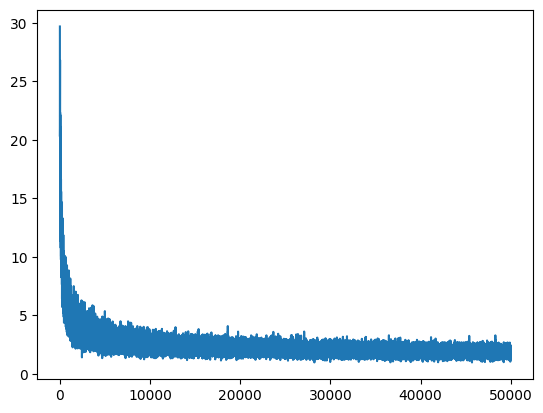

In [141]:
plt.plot(stepi, lossi)

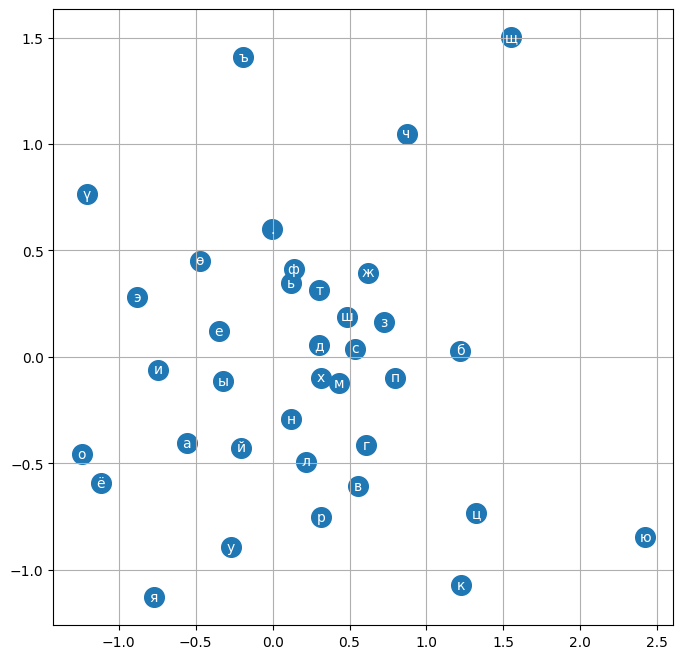

In [129]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")

plt.grid('minor')

In [148]:
#sampling the model

g = torch.Generator().manual_seed(95102218 + 10)

for _ in range(10):
    out = []
    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + B1)
        logits = h @ W2 + B2
        probs = F.softmax(logits, dim=1)
        idx = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [idx]
        out.append(idx)
        if idx == 0:
            break

    print(''.join(itos[i] for i in out))

лүмдэмбэрдигчаа.
херцэцэг.
занд.
ашидэрмарысбердиенжгээ.
бет.
кетебек.
рай.
ажефаримил.
ойшийн.
бондахишигбат.
